## Bienvenidos a mi primer proyecto

In [193]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

Por un "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 1: invalid start byte"
hay que poner ,encoding='latin1'

In [2]:
df = pd.read_csv("INPUT/sharky_messy.csv",encoding="latin1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
def columnCompare(col1,col2,perc):
    equal = 0
    dist = 0
    for i in range(5992):
        if df[col1][i] == df[col2][i]:
            equal +=1
        else:
            dist +=1

    porcent_dist = dist/(equal+dist)*100

    print("equal:",equal)
    print("dist:",dist)
    print("Porcentaje diferencias:",round(porcent_dist,2),"%")

    if porcent_dist<perc:
        print("Se puede despreciar las diferentes frente al total")
    else:
        print("El valor es significativo, son columnas diferentes")
        
        
def foundDate(arr):
    date=r"\d{2}-\w{3}-\d+"
    new=[]
    for i in arr:
        if re.findall(date,i):
            new.append(re.findall(date, i)[0])
        else:
            new.append("NotDoc")
    return new

def foundDate2(arr):
    date=r"\d{4}\.\d{2}\.\d{2}"
    new=[]
    for i in arr:
        if re.findall(date,i):
            new.append(re.findall(date, i)[0])
        else:
            new.append("NotDoc")
    return new


Vamos a analizar las columnas y la información general que nos encontramos para quedarnos con un dataset que aporte valor al análisis

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
df.shape

(5992, 24)

In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)

Unnamed: 22    5991
Unnamed: 23    5990
Time           3213
Species        2934
Age            2681
Sex             567
Activity        527
Location        496
Area            402
Name            200
dtype: int64

In [7]:
df["Unnamed: 22"].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [8]:
df["Unnamed: 23"].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

Descartar columnas que no interesan para el análisis en un nuevo dataset:
- Unnamed parecen columnas de "comentarios" cuando se generaba el dataset que no aportan información. 

In [9]:
df_clean1 = df.drop(["Unnamed: 22","Unnamed: 23"],axis = 1)

In [10]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [11]:
col = "Case Number"
df[col].value_counts()[df[col].value_counts()>1]

1966.12.26        2
2009.12.18        2
1990.05.10        2
1913.08.27.R      2
2006.09.02        2
2014.08.02        2
1980.07.00        2
1962.06.11.b      2
2012.09.02.b      2
1920.00.00.b      2
1983.06.15        2
1923.00.00.a      2
2013.10.05        2
1907.10.16.R      2
1915.07.06.a.R    2
2005.04.06        2
Name: Case Number, dtype: int64

In [12]:
df['href'].equals(df['href formula'])

False

In [13]:
columnCompare("href","href formula",5)

equal: 5938
dist: 54
Porcentaje diferencias: 0.9 %
Se puede despreciar las diferentes frente al total


In [14]:
columnCompare("Case Number","Case Number.1",5)

equal: 5979
dist: 13
Porcentaje diferencias: 0.22 %
Se puede despreciar las diferentes frente al total


In [15]:
columnCompare("Case Number.1","Case Number.2",5)

equal: 5981
dist: 11
Porcentaje diferencias: 0.18 %
Se puede despreciar las diferentes frente al total


Despreciamos entonces la información que puede aportar las columnas de:
- href formula
- Case Number 1.
- Case Number 2.

In [16]:
df_clean2 = df_clean1.drop(["href formula","Case Number.1","Case Number.2"],axis = 1)
df_clean2.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5989
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5988
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5987
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,14h30,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5986
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5985
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,12,Lacerations & punctures to lower right leg,N,Late afternoon,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5984


In [17]:
df_clean2.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'original order'],
      dtype='object')

Ahora eliminamos las columnas con información que no aporta datos relevantes:
- "Investigator or Source" NA
- "Name" NA
- "original order" parece el ínidice que tenían antes de utilizar una nueva numeración. NA

In [18]:
df_clean3 = df_clean2.drop(["Investigator or Source","Name","original order"],axis = 1)
df_clean3.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,pdf,href
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [19]:
#Renombramos las columnas
dfc = df_clean3.rename(columns={"Species ":"Species", 
                                "Sex ":"Sex", 
                                "Fatal (Y/N)":"Fatal", 
                                "Case Number":"ID", 
                                "pdf":"Pdf", 
                                "href":"Href"})
dfc.head()

,ID,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Pdf,Href
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [20]:
dfc.dtypes

ID          object
Date        object
Year         int64
Type        object
Country     object
Area        object
Location    object
Activity    object
Sex         object
Age         object
Injury      object
Fatal       object
Time        object
Species     object
Pdf         object
Href        object
dtype: object

In [21]:
dfc.Sex.value_counts()

M      4835
F       585
M         2
N         1
lli       1
.         1
Name: Sex, dtype: int64

In [22]:
dfc.Sex = dfc.Sex.fillna("NotDoc")

In [23]:
#Arreglamos la columna SEX
dfc["Sex"][dfc["Sex"].str.startswith("M ")] = "M"
dfc["Sex"][dfc["Sex"].str.startswith("N")] = "NotDoc"
dfc["Sex"][dfc["Sex"].str.startswith("lli")] = "NotDoc"
dfc["Sex"][dfc["Sex"].str.startswith(".")] = "NotDoc"

/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [24]:
dfc.Sex.value_counts()

M         4837
F          585
NotDoc     570
Name: Sex, dtype: int64

In [25]:
for i in dfc.Date:
    if len(i) > 9:
        print (i)

Reported  14-Jul-2016
Reported 08-Jul-2016
Reported 03-Mar-2016
 19-Feb-2016
Reported 10-Feb-2016
Reported 11-Jan-2016
Reported 25-Jun-2015
Reported 23-Dec-2014
Reported 03-Dec-2014
Reported 17-Nov-2014
Reported 12-Sep-2014
Reported 25-Aug-2014
Reported 27-Jun-2014
Reported 17-Jun-2014
Reported 10-May-2014
Reported 12-Apr-2014
Reported 17-Feb-2014
 25-Sep-2013
 21-Sep-2013
 21-Sep-2013
 14-Sep-2013
 12-Sep-2013
 07-Sep-2013
 07-Sep-2013
 02-Sep-2013
 01-Sep-2013
 01-Sep-2013
 01-Sep-2013
 25-Aug-2013
 25-Aug-2013
 18-Aug-2013
 14-Aug-2013
 13-Aug-2013
Reported 08-Aug-2013
 05-Aug-2013
  31-Jul-2013
  30-Jul-2013
  29-Jul-2013
  29-Jul-2013
    22-Jul-2013
Reported 17-Jul-2013
Reported 14-Jun-2013
Reported 02-Apr-2013
Reported 21-Mar-2013
Reported 21-Jan-2013
Reported 11-Oct-2012
Reported 28-Jun-2012
Reported 22-Jan-2012
Reported 26-Dec-2011
Reported 20-Nov-2011
  29-Oct-2011
Reported 28-Oct-2011
  29-Oct-2011
16-Aug--2011
11-Aug--2011
Reported 14-Jun-2011
Reported 06-Jun-2011
Reported 

In [26]:
newcol = foundDate2(dfc.ID)

In [27]:
print(newcol)

['2016.09.18', '2016.09.18', '2016.09.18', '2016.09.17', '2016.09.15', '2016.09.15', '2016.09.11', '2016.09.07', '2016.09.06', '2016.09.05', '2016.09.05', '2016.09.04', '2016.09.01', '2016.08.29', '2016.08.29', '2016.08.27', '2016.08.25', '2016.08.07', '2016.08.06', '2016.08.04', '2016.07.29', '2016.07.28', '2016.07.28', '2016.07.27', '2016.07.26', '2016.07.24', '2016.07.23', '2016.07.23', '2016.07.20', '2016.07.17', '2016.07.16', '2016.07.16', '2016.07.15', '2016.07.14', '2016.07.08', '2016.07.08', '2016.07.07', '2016.07.07', '2016.07.06', '2016.07.04', '2016.06.27', '2016.06.25', '2016.06.24', '2016.06.23', '2016.06.21', '2016.06.21', '2016.06.15', '2016.06.15', '2016.06.14', '2016.06.11', '2016.06.07', '2016.06.05', '2016.06.05', '2016.06.04', '2016.06.02', '2016.06.02', '2016.05.31', '2016.05.29', '2016.05.29', '2016.05.22', '2016.05.21', '2016.05.21', '2016.05.18', '2016.05.15', '2016.05.03', '2016.05.02', '2016.04.25', '2016.04.23', '2016.04.22', '2016.04.19', '2016.04.18', '2016

In [28]:
column_values = pd.Series(newcol)
dfc.insert(loc=2, column='new_date', value=column_values)

In [29]:
dfc.head()

,ID,Date,new_date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Pdf,Href
0,2016.09.18.c,18-Sep-16,2016.09.18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016.09.18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016.09.18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016.09.17,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016.09.15,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [30]:
dfc.dtypes

ID          object
Date        object
new_date    object
Year         int64
Type        object
Country     object
Area        object
Location    object
Activity    object
Sex         object
Age         object
Injury      object
Fatal       object
Time        object
Species     object
Pdf         object
Href        object
dtype: object

In [31]:
dfc.new_date.value_counts()

NotDoc        126
1950.00.00     13
1957.00.00     11
1942.00.00     11
1960.00.00     10
             ... 
1984.07.00      1
1959.07.03      1
1961.08.02      1
1933.02.26      1
2014.11.08      1
Name: new_date, Length: 4946, dtype: int64

In [32]:
for i in dfc.new_date:
    if len(i) > 9:
        print (i)

2016.09.18
2016.09.18
2016.09.18
2016.09.17
2016.09.15
2016.09.15
2016.09.11
2016.09.07
2016.09.06
2016.09.05
2016.09.05
2016.09.04
2016.09.01
2016.08.29
2016.08.29
2016.08.27
2016.08.25
2016.08.07
2016.08.06
2016.08.04
2016.07.29
2016.07.28
2016.07.28
2016.07.27
2016.07.26
2016.07.24
2016.07.23
2016.07.23
2016.07.20
2016.07.17
2016.07.16
2016.07.16
2016.07.15
2016.07.14
2016.07.08
2016.07.08
2016.07.07
2016.07.07
2016.07.06
2016.07.04
2016.06.27
2016.06.25
2016.06.24
2016.06.23
2016.06.21
2016.06.21
2016.06.15
2016.06.15
2016.06.14
2016.06.11
2016.06.07
2016.06.05
2016.06.05
2016.06.04
2016.06.02
2016.06.02
2016.05.31
2016.05.29
2016.05.29
2016.05.22
2016.05.21
2016.05.21
2016.05.18
2016.05.15
2016.05.03
2016.05.02
2016.04.25
2016.04.23
2016.04.22
2016.04.19
2016.04.18
2016.04.13
2016.04.09
2016.04.08
2016.04.07
2016.04.07
2016.03.31
2016.03.30
2016.03.28
2016.03.28
2016.03.26
2016.03.13
2016.03.11
2016.03.10
2016.03.04
2016.03.03
2016.03.02
2016.02.22
2016.02.19
2016.02.12
2016.02.10

2005.11.27
2005.11.25
2005.11.25
2005.11.25
2005.11.24
2005.11.21
2005.11.20
2005.11.16
2005.11.15
2005.11.12
2005.11.02
2005.11.02
2005.10.29
2005.10.25
2005.10.22
2005.10.21
2005.10.19
2005.10.15
2005.10.13
2005.10.11
2005.10.06
2005.10.03
2005.10.01
2005.09.27
2005.09.24
2005.09.23
2005.09.22
2005.09.20
2005.09.11
2005.09.07
2005.09.05
2005.09.04
2005.09.02
2005.09.02
2005.08.24
2005.08.24
2005.08.22
2005.08.21
2005.08.19
2005.08.14
2005.08.12
2005.08.06
2005.08.01
2005.07.27
2005.07.23
2005.07.22
2005.07.17
2005.07.17
2005.07.15
2005.07.15
2005.07.13
2005.07.01
2005.06.27
2005.06.25
2005.06.22
2005.06.21
2005.06.18
2005.06.16
2005.06.13
2005.06.07
2005.06.05
2005.06.04
2005.06.02
2005.05.28
2005.05.27
2005.05.25
2005.05.15
2005.05.14
2005.05.03
2005.05.02
2005.05.02
2005.04.25
2005.04.17
2005.04.16
2005.04.16
2005.04.13
2005.04.09
2005.04.07
2005.04.06
2005.04.06
2005.03.28
2005.03.27
2005.03.25
2005.03.19
2005.03.12
2005.03.10
2005.03.09
2005.03.05
2005.02.26
2005.02.22
2005.02.16

1994.01.31
1994.01.31
1994.01.30
1994.01.12
1994.01.09
1994.01.03
1994.00.00
1994.00.00
1993.12.00
1993.11.28
1993.11.21
1993.11.12
1993.11.00
1993.10.30
1993.10.26
1993.10.10
1993.10.00
1993.09.30
1993.09.26
1993.09.16
1993.09.16
1993.09.14
1993.09.09
1993.09.03
1993.08.21
1993.08.19
1993.08.19
1993.08.15
1993.08.15
1993.08.14
1993.08.12
1993.08.00
1993.08.00
1993.07.30
1993.07.07
1993.06.30
1993.06.29
1993.06.11
1993.06.11
1993.06.10
1993.06.09
1993.06.05
1993.06.01
1993.06.00
1993.05.00
1993.05.00
1993.04.00
1993.03.27
1993.03.22
1993.03.17
1993.03.14
1993.03.12
1993.03.00
1993.02.19
1993.02.18
1993.02.04
1993.01.23
1993.01.05
1993.01.04
1993.01.02
1993.00.00
1993.00.00
1993.00.00
1993.00.00
1992.12.28
1992.12.23
1992.11.29
1992.11.25
1992.11.23
1992.11.14
1992.11.12
1992.11.11
1992.11.05
1992.11.05
1992.10.29
1992.10.22
1992.10.15
1992.10.11
1992.10.01
1992.09.18
1992.09.13
1992.09.11
1992.09.10
1992.09.00
1992.08.29
1992.08.25
1992.08.21
1992.08.18
1992.08.17
1992.08.00
1992.07.23

1960.04.12
1960.04.10
1960.04.03
1960.04.03
1960.04.01
1960.04.00
1960.04.00
1960.04.00
1960.03.31
1960.03.28
1960.02.29
1960.02.27
1960.02.27
1960.02.24
1960.02.19
1960.02.10
1960.02.07
1960.02.03
1960.01.30
1960.01.26
1960.01.21
1960.01.16
1960.01.13
1960.01.07
1960.01.01
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1960.00.00
1959.12.29
1959.12.28
1959.12.26
1959.12.19
1959.12.19
1959.12.11
1959.12.07
1959.12.03
1959.12.00
1959.11.29
1959.11.28
1959.11.22
1959.11.16
1959.11.15
1959.11.12
1959.11.10
1959.11.09
1959.11.01
1959.10.07
1959.10.05
1959.10.04
1959.10.02
1959.10.00
1959.09.30
1959.09.27
1959.09.26
1959.09.26
1959.09.11
1959.09.10
1959.09.02
1959.09.00
1959.08.31
1959.08.30
1959.08.25
1959.08.20
1959.08.15
1959.08.15
1959.08.14
1959.08.14
1959.08.13
1959.08.12
1959.08.11
1959.08.10
1959.08.05
1959.08.02
1959.07.30
1959.07.28
1959.07.25
1959.07.25
1959.07.23
1959.07.23
1959.07.03
1959.07.02
1959.07.00
1959.07.00
1959.06.26

1922.12.14
1922.12.05
1922.09.29
1922.10.29
1922.09.28
1922.09.26
1922.09.21
1922.07.19
1922.06.17
1922.05.24
1922.05.06
1922.04.26
1922.03.20
1922.03.13
1922.03.02
1922.02.22
1922.02.04
1922.01.28
1922.01.15
1922.01.13
1922.01.04
1921.12.11
1921.11.27
1921.11.27
1921.11.15
1921.10.12
1921.10.04
1921.09.00
1921.08.29
1921.08.28
1921.01.11
1920.11.29
1921.08.22
1920.11.22
1920.11.04
1920.07.14
1920.07.05
1920.06.29
1920.06.27
1920.03.08
1920.01.24
1920.02.03
1920.01.24
1920.01.15
1920.00.00
1920.00.00
1920.00.00
1919.12.30
1919.12.07
1919.11.18
1919.09.12
1919.08.10
1919.05.29
1919.04.06
1919.03.16
1919.01.17
1919.01.15
1919.01.09
1919.01.05
1900.00.00
1919.00.00
1918.11.00
1918.11.00
1918.09.19
1918.03.22
1918.00.00
1917.12.15
1917.11.00
1917.09.21
1917.09.09
1917.09.00
1917.07.18
1917.07.15
1917.06.03
1917.05.31
1917.05.05
1917.00.00
1916.12.30
1916.12.08
1916.12.08
1916.11.15
1916.11.10
1916.11.09
1916.10.11
1916.08.24
1916.07.26
1916.07.13
1916.07.13
1916.07.12
1916.07.12
1916.07.12

In [33]:
def dayCalculator(arr):
    days = []
    for i in arr:
        if i[8:] == "00" or i == "NotDoc":
            days.append("NotDoc")
        else:
            days.append(i[8:])
    return days
        
def monthCalculator(arr):
    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
    months = []
    for i in arr:
        if i[5:7] == "00" or i == "NotDoc":
            months.append("NotDoc")
        else:
            months.append(meses[int(i[5:7])-1])
    return months

def yearCalculator(arr):
    years = []
    for i in arr:
        if i[:4] == "00" or i == "NotDoc":
            years.append("NotDoc")
        else:
            years.append(i[:4])
    return years

In [34]:
days = dayCalculator(dfc.new_date)
months = monthCalculator(dfc.new_date)
years = yearCalculator(dfc.new_date)

In [35]:
column_years = pd.Series(years)
dfc.insert(loc=3, column='new_years', value=column_years)

column_months = pd.Series(months)
dfc.insert(loc=3, column='new_months', value=column_months)

column_days = pd.Series(days)
dfc.insert(loc=3, column='new_days', value=column_days)

In [36]:
dfc.head()

,ID,Date,new_date,new_days,new_months,new_years,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Pdf,Href
0,2016.09.18.c,18-Sep-16,2016.09.18,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016.09.18,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016.09.18,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016.09.17,17,Sep,2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016.09.15,15,Sep,2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [37]:
dfc.new_years.value_counts()

2015      138
2011      128
NotDoc    126
2014      125
2013      122
         ... 
1812        1
1738        1
1859        1
1818        1
1733        1
Name: new_years, Length: 232, dtype: int64

In [38]:
dfc.new_months.value_counts()

Jul       633
Ago       579
NotDoc    524
Sep       524
Ene       500
Jun       474
Dic       423
Abr       410
Oct       407
Mar       398
Nov       393
May       368
Feb       359
Name: new_months, dtype: int64

In [39]:
dfc.new_days.value_counts()

NotDoc    861
26        200
15        188
27        185
02        183
28        179
25        178
14        176
12        173
24        173
11        172
09        171
13        171
10        170
05        170
22        169
21        169
04        169
16        169
19        167
06        167
01        167
08        163
07        155
03        155
30        154
29        153
18        150
23        147
20        144
17        142
31        102
Name: new_days, dtype: int64

In [40]:
#Vamos a por las horas del día.
dfc.Time.value_counts()

Afternoon         174
11h00             123
Morning           107
12h00             107
15h00             100
                 ... 
17h46               1
15h25               1
17h00 or 17h40      1
16h55               1
Mid morning         1
Name: Time, Length: 357, dtype: int64

In [41]:
dfc.Time = df.Time.fillna("NotDoc").astype("str")

In [42]:
dfc.Time.value_counts()

NotDoc            3213
Afternoon          174
11h00              123
Morning            107
12h00              107
                  ... 
17h46                1
15h25                1
17h00 or 17h40       1
16h55                1
14h30 / 15h30        1
Name: Time, Length: 358, dtype: int64

In [43]:
dfc.Time = dfc.Time.astype("str")

In [44]:
dfc.Time.value_counts()

NotDoc            3213
Afternoon          174
11h00              123
Morning            107
12h00              107
                  ... 
17h46                1
15h25                1
17h00 or 17h40       1
16h55                1
14h30 / 15h30        1
Name: Time, Length: 358, dtype: int64

In [45]:
#Definimos una función que nos devuelva la hora en formato XX cuando esta exista "XXh
def findHour(arr):
    hours = []
    formato = r"\d+h\d+"
    for i in arr:
        if re.findall(formato,i):
            hours.append(re.findall(formato,i)[0][:2])
        else:
            hours.append(i)
    return hours

In [46]:
hours = findHour(dfc.Time)
print(hours)

['13', '11', '10', 'NotDoc', 'NotDoc', 'NotDoc', '15', '14', '15', 'Late afternoon', 'Late afternoon', 'NotDoc', 'NotDoc', '15', '14', '17', '16', 'NotDoc', 'NotDoc', 'NotDoc', '11', 'NotDoc', 'NotDoc', 'NotDoc', '12', '19', 'NotDoc', 'NotDoc', 'After noon', 'NotDoc', '1300', '11', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', '10', 'NotDoc', '14', '22', '16', '14', '11', 'NotDoc', '15', '14', '06', 'NotDoc', '17', '15', '11', '08', '11', 'Morning', 'NotDoc', 'Afternoon', '16', '16', '15', '12', '18', '17', 'Morning ', '13', '15', 'Afternoon', '07', '17', '08', '12', 'NotDoc', 'NotDoc', '10', 'NotDoc', 'NotDoc', 'NotDoc', '11', '19', 'NotDoc', '11', 'NotDoc', 'Morning', '13', 'Afternoon', 'Afternoon', 'Midnight', 'NotDoc', '19', '16', '15', 'NotDoc', '12', '13', 'Late afternoon', 'NotDoc', '14', '11', '09', 'NotDoc', 'Morning', 'NotDoc', 'Afternoon', '11', 'Morning', 'NotDoc', 'Morning', '07', 'NotDoc', 'NotDoc', '10', 'NotDoc', 'Morning', 'Afternoon', 'Morning', 'NotDoc', '18', '11', '11', 

In [47]:
dfc.insert(loc=3, column='new_time', value=pd.Series(hours))
dfc.head()

,ID,Date,new_date,new_time,new_days,new_months,new_years,Year,Type,Country,...,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Pdf,Href
0,2016.09.18.c,18-Sep-16,2016.09.18,13,18,Sep,2016,2016,Unprovoked,USA,...,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016.09.18,11,18,Sep,2016,2016,Unprovoked,USA,...,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016.09.18,10,18,Sep,2016,2016,Unprovoked,USA,...,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016.09.17,NotDoc,17,Sep,2016,2016,Unprovoked,AUSTRALIA,...,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NotDoc,NaN,2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016.09.15,NotDoc,15,Sep,2016,2016,Unprovoked,AUSTRALIA,...,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NotDoc,2 m shark,2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


Limpiamos de nuevo el dataset:
Me quedo con el ID, new_date, new_time, new_days, new_months, new_years, Type, Country, Area, Activity, Sex, Age, Injury, Fatal.

In [48]:
dfn = dfc[["ID","new_time","new_date","new_days","new_months","new_years", "Type", "Country", "Area", "Activity", "Sex", "Age", "Injury", "Fatal"]]

In [49]:
dfn.head()

,ID,new_time,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Sex,Age,Injury,Fatal
0,2016.09.18.c,13,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N
1,2016.09.18.b,11,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N
2,2016.09.18.a,10,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N
3,2016.09.17,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N


In [50]:
dfn.new_time.value_counts()

NotDoc              3213
11                   250
16                   230
14                   229
15                   223
                    ... 
Just before dawn       1
"Night"                1
Before daybreak        1
Noon                   1
Late morning           1
Name: new_time, Length: 92, dtype: int64

In [51]:
def dayTime(arr):
    
    #daytime=["Morning","Afternoon","Sunset","Night"]
    daytime =[]
    morning_match = r"(\worning|\wunch|\waybreak|\widday|\waytime|05|06|07|08|09|10|11|830)"
    morning = ["lunchtime", "midday"]
    afternoon_match = r"(\w+noon|\wnon|\woon|12|13|14|15|16)"
    sunset = ["just before noon", "daybreak", "sundown", "dawn", "sunset","dusk"]
    sunset_match = r"(\wunset|\wusk|\wvening|\wawn|\wundown|17|18|19|20)"
    night = ["noon","midnight","night"]
    night_match = r"(\widnight|\wark|\wight|21|22|23|24|00|01|02|03|04)"
    for i in arr:
        if i == "NotDoc":
            daytime.append("NotDoc")
        elif type(i)!= "int" or type(i) != "float":
            if i.lower() in morning or re.findall(morning_match,i):
                daytime.append("Morning")
            elif re.findall(afternoon_match,i):
                daytime.append("Afternoon")
            elif i.lower() in sunset or re.findall(sunset_match,i):
                daytime.append("Sunset")
            elif i.lower() in night or re.findall(night_match,i):
                daytime.append("Night")
            else:
                daytime.append("FailDoc")

                
    return daytime       

In [52]:
daytime = dayTime(dfn.new_time)
print(daytime)

['Afternoon', 'Morning', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'NotDoc', 'NotDoc', 'Afternoon', 'Afternoon', 'Sunset', 'Afternoon', 'NotDoc', 'NotDoc', 'NotDoc', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'Afternoon', 'Sunset', 'NotDoc', 'NotDoc', 'Afternoon', 'NotDoc', 'Afternoon', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', 'Morning', 'NotDoc', 'Afternoon', 'Night', 'Afternoon', 'Afternoon', 'Morning', 'NotDoc', 'Afternoon', 'Afternoon', 'Morning', 'NotDoc', 'Sunset', 'Afternoon', 'Morning', 'Morning', 'Morning', 'Morning', 'NotDoc', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Sunset', 'Sunset', 'Morning', 'Afternoon', 'Afternoon', 'Afternoon', 'Morning', 'Sunset', 'Morning', 'Afternoon', 'NotDoc', 'NotDoc', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'Morning', 'Sunset', 'NotDoc', 'Morning', 'NotDoc', 'Morning', 'Afternoon', 'Afternoon', 'Afternoon', 'Night', 'NotDoc', 'Sunset', 'Afternoon', 

In [53]:
dfn.insert(loc=2, column='daytime', value=pd.Series(daytime))
dfn.head()

,ID,new_time,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Sex,Age,Injury,Fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N
3,2016.09.17,NotDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N


In [54]:
for col, num in dfn.daytime.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NotDoc 3213
Afternoon 1298
Morning 880
Sunset 447
Night 115
FailDoc 39


In [55]:
for col, num in dfn.new_time.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NotDoc 3213
11 250
16 230
14 229
15 223
12 198
13 191
17 185
Afternoon 174
10 167
18 118
09 112
Morning 107
08 86
07 76
Night 58
19 51
06 36
Evening 33
Late afternoon 32
20 30
Dusk 15
P.M. 12
A.M. 12
Early morning 11
05 11
03 10
Midday 9
Early afternoon 8
23 6
02 6
04 6
01 5
-- 5
Sunset 4
22 4
21 4
Midnight 4
Just before noon 2
AM 2
1600 2
Dark 2
Dawn 2
  2
Late afternon 2
night 1
Late Afternoon 1
Daybreak 1
2 hrs before sunset 1
After dusk 1
   1
8:04 PM 1
Shortly after midnight 1
Daytime 1
Midday. 1
Lunchtime 1
dusk 1
00 1
Mid afternoon 1
500 1
"shortly before dusk" 1
Morning  1
Late night 1
15j45 1
"After dark" 1
Possibly same incident as 2000.08.21 1
After Dusk 1
830 1
   1
30 minutes after 1992.07.08.a 1
Nightfall 1
FATAL  (Wire netting installed at local beaches after this incident.) 1
X 1
Just before sundown 1
"Early evening" 1
1300 1
Mid morning 1
Mid-morning 1
2 hours after Opperman 1
After noon 1
Early Morning 1
    1
After midnight 1
1500 1
06j00 1
"Evening" 1
"After lunch" 

In [118]:
def hourTime(arr):
    hour=r"\d+"
    lista = []
    for i in arr:
        if re.findall(hour,i):
            lista.append(re.findall(hour,i)[0][:2])
        else:
            lista.append("NoDoc")

    return lista

In [57]:
hourtime = hourTime(dfn.new_time)
#print(hourtime)


In [58]:
dfn.insert(loc=2, column='hourtime', value=pd.Series(hourtime))
dfn.head()

,ID,new_time,hourtime,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Sex,Age,Injury,Fatal
0,2016.09.18.c,13,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N
1,2016.09.18.b,11,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N
2,2016.09.18.a,10,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N
3,2016.09.17,NotDoc,NoDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,NotDoc,NoDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N


In [59]:
for col, num in dfn.hourtime.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NoDoc 3744
11 250
16 232
14 229
15 225
12 198
13 192
17 185
10 167
18 118
09 112
08 86
07 76
19 51
06 37
20 31
05 11
03 10
04 6
02 6
23 6
01 5
21 4
22 4
2 2
8 1
50 1
30 1
00 1
83 1


In [60]:
#postcleaning de elementos no válidos:
dfn["hourtime"][dfn["hourtime"]=="30"] = "NoDoc"
dfn["hourtime"][dfn["hourtime"]=="8"] = "08"
dfn["hourtime"][dfn["hourtime"]=="50"] = "05"
dfn["hourtime"][dfn["hourtime"]=="83"] = "NoDoc"
dfn["hourtime"][dfn["hourtime"]=="2"] = "NoDoc"

/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
for col, num in dfn.hourtime.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NoDoc 3748
11 250
16 232
14 229
15 225
12 198
13 192
17 185
10 167
18 118
09 112
08 87
07 76
19 51
06 37
20 31
05 12
03 10
23 6
04 6
02 6
01 5
22 4
21 4
00 1


In [155]:
dff = dfn [["ID","hourtime","daytime","new_date","new_days","new_months","new_years", "Type", "Country", "Area", "Activity","Fatal"]]
dff.head()

,ID,hourtime,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N
3,2016.09.17,NoDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N
4,2016.09.15,NoDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N


In [156]:
dff.shape

(5992, 12)

Eliminamos duplicados

In [157]:
dff = dff.drop_duplicates()

In [158]:
dff.shape

(5990, 12)

In [159]:
dff.Fatal.value_counts()

N          4314
Y          1552
UNKNOWN      93
 N            8
#VALUE!       1
n             1
N             1
F             1
Name: Fatal, dtype: int64

In [160]:
dff.Fatal.isnull().sum()

19

In [161]:
dff.Fatal = dff.Fatal.fillna("UNKNOWN").astype("str")

In [162]:
dff.Fatal.value_counts()

N          4314
Y          1552
UNKNOWN     112
 N            8
#VALUE!       1
n             1
N             1
F             1
Name: Fatal, dtype: int64

In [163]:
def isfatal(arr):
    no = r"(N|n)"
    yes = r"[y|Y|F|f|]"
    unknown = r"UNKNOWN"
    lista=[]
    
    for i in arr:
        if re.findall(unknown,i):
            lista.append("UNKNOWN")
        elif re.findall(yes,i):
            lista.append("YES")
        elif re.findall(no,i):
            lista.append("NO")
        else:
            lista.append("UNKNOWN")
    return lista

In [164]:
fatal = isfatal(dff.Fatal)


In [165]:
dff.insert(loc = 12, column='real_fatal', value=pd.Series(fatal))
dff.head()

,ID,hourtime,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Fatal,real_fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N,NO
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N,NO
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N,NO
3,2016.09.17,NoDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N,NO
4,2016.09.15,NoDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N,NO


In [188]:
dff = dff [["ID","hourtime","daytime","new_date","new_days","new_months","new_years", "Type","real_fatal"]]
dff.head()

,ID,hourtime,daytime,new_date,new_days,new_months,new_years,Type,real_fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,NO
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,NO
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,NO
3,2016.09.17,NoDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,NO
4,2016.09.15,NoDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,NO


In [189]:
dff = dff.drop_duplicates()

In [190]:
dff.shape

(5985, 9)

In [210]:
dff.to_csv("sharky_cleany.csv")

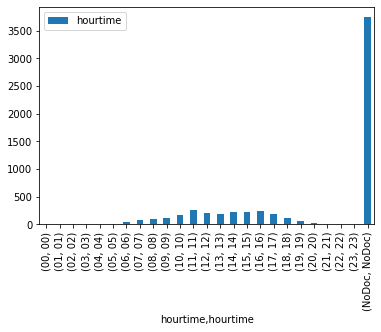

In [203]:
dff.groupby(['hourtime']).agg({'hourtime':'value_counts'
                                
                              }).plot.bar()

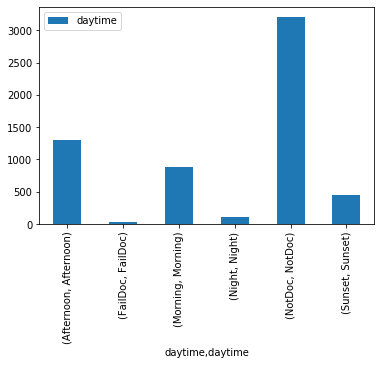

In [206]:
dff.groupby(['daytime']).agg({'daytime':'value_counts'
                                
                              }).plot.bar()